In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetic_df = pd.read_csv('/content/diabetic_data.csv')
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Text(0.5, 1.0, 'Readmission Distribution')

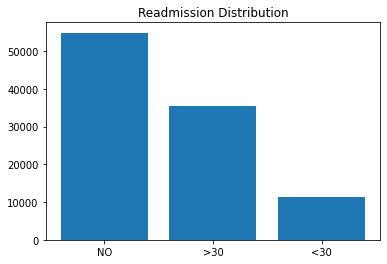

In [3]:
plt.bar(diabetic_df.readmitted.value_counts().index,diabetic_df.readmitted.value_counts())
plt.title('Readmission Distribution')


In [4]:
diabetic_df.readmitted.value_counts(normalize=True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [6]:
diabetic_df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

It appears that only a small portion of patients was readmitted to hospital within 30 days

In [ ]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Feature Description

| Feature name                | Type    | Description and values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |   |   |
|-----------------------------|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| Encounter ID                | Numeric | Unique identifier of an encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |   |
| Patient number              | Numeric | Unique identifier of a patient                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   |   |
| Race                        | Nominal | Values: Caucasian, Asian, African American, Hispanic, and other                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |   |   |
| Gender                      | Nominal | Values: male, female, and unknown/invalid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |   |
| Age                         | Nominal | Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |   |
| Weight                      | Numeric | Weight in pounds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |   |
| Admission type              | Nominal | Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |   |   |
| Discharge disposition       | Nominal | Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |   |
| Admission source            | Nominal | Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |   |   |
| Time in hospital            | Numeric | Integer number of days between admission and discharge                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |   |   |
| Payer code                  | Nominal | Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |   |
| Medical specialty           | Nominal | Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |   |
| Number of lab procedures    | Numeric | Number of lab tests performed during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |   |
| Number of procedures        | Numeric | Number of procedures (other than lab tests) performed during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |   |
| Number of medications       | Numeric | Number of distinct generic names administered during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |   |
| Number of outpatient visits | Numeric | Number of outpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   |   |
| Number of emergency visits  | Numeric | Number of emergency visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |   |   |
| Number of inpatient visits  | Numeric | Number of inpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |   |   |
| Diagnosis 1                 | Nominal | The primary diagnosis (coded as first three digits of ICD9); 848 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |   |
| Diagnosis 2                 | Nominal | Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   |   |
| Diagnosis 3                 | Nominal | Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |   |
| Number of diagnoses         | Numeric | Number of diagnoses entered to the system                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |   |
| Glucose serum test result   | Nominal | Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |   |
| A1c test result             | Nominal | Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.                                                                                                                                                                                                                                                                                                                                                                                                              |   |   |
| Change of medications       | Nominal | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |   |
| Diabetes medications        | Nominal | Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |   |
| 24 features for medications | Nominal | For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed |   |   |
| Readmitted                  | Nominal | Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.                                                                                                                       

In [ ]:
#To check the number of rows and columns
diabetic_df.shape
print(f'The dataset has {diabetic_df.shape[0]} rows and {diabetic_df.shape[1]} columns')

The dataset has 101766 rows and 50 columns


# Data Cleaning and Exploratory Data Analysis

Although it appears that there is no NA value in the dataset but there are some ? value. I will replace ? value with nan
and treat them as missing values

In [ ]:
diabetic_df.replace("?", np.nan, inplace = True)

In [ ]:
# To check if there are any missing values
diabetic_df.isna().mean()*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

* It appears that 96% weight values are missing from the dataset. imputation with existing values doesn't work since the majority of data in this column is missing. I decided to drop the entire column.

* There are missing values in column "payer_code" and "medical_specialty" but these columns seem to be irrelevant to the goal of my analysis which is to Identify the patients with higher risk for hospital readmissions within 30 days. I decided to drop the entire columns.

* race and diag codes might be relevant to my analysis. Since the missing values are less than 3%. Leave it as is for now. race has "Other" as value, so I will fill in na with "Other"

In [ ]:
# To fill in na for "race"
diabetic_df.race.fillna('Other',inplace=True)


In [ ]:
# To drop the columns
diabetic_df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

ID should be categorical variables so I converted encounter_id, patient_nbr, admission_type_id, discharge_disposition_id,admission_source_id to object type.

In [ ]:
diabetic_df['encounter_id'] = diabetic_df['encounter_id'].astype('object')
diabetic_df['patient_nbr'] = diabetic_df['patient_nbr'].astype('object')
diabetic_df['admission_type_id'] = diabetic_df['admission_type_id'].astype('object')
diabetic_df['discharge_disposition_id'] = diabetic_df['discharge_disposition_id'].astype('object')
diabetic_df['admission_source_id'] = diabetic_df['admission_source_id'].astype('object')


In [ ]:
# To check if there are any duplicates
diabetic_df.duplicated().sum()

0

There are no duplicates in the dataset

In [ ]:
# To check if a patient has more than 1 encounter record in our dataset
diabetic_df.groupby('patient_nbr')['encounter_id'].count().sort_values(ascending=False)

patient_nbr
88785891     40
43140906     28
1660293      23
23199021     23
88227540     23
             ..
34935156      1
34935795      1
34935804      1
34937658      1
189502619     1
Name: encounter_id, Length: 71518, dtype: int64

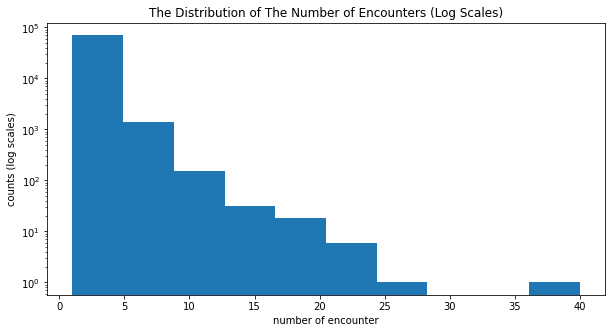

In [ ]:
# To check the distribution of the number of encounters
plt.figure(figsize=(10,5))
plt.hist(diabetic_df.groupby('patient_nbr')['encounter_id'].count().sort_values(ascending=False),log=True)
plt.title('The Distribution of The Number of Encounters (Log Scales)')
plt.xlabel('number of encounter')
plt.ylabel('counts (log scales)')
plt.show()

There were patients had more than one encounter record, meaning the patient readmitted to hospital more than 1 time. That might cause bias in our dataset so I decided to remove the subsequent readmission for these patients who have been repeated admitted to hospital.

In [ ]:
diabetic_df = diabetic_df.drop_duplicates(subset=['patient_nbr'],keep='first')

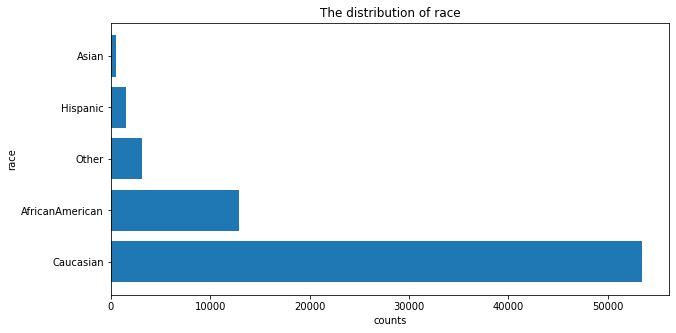

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64
**************************************************


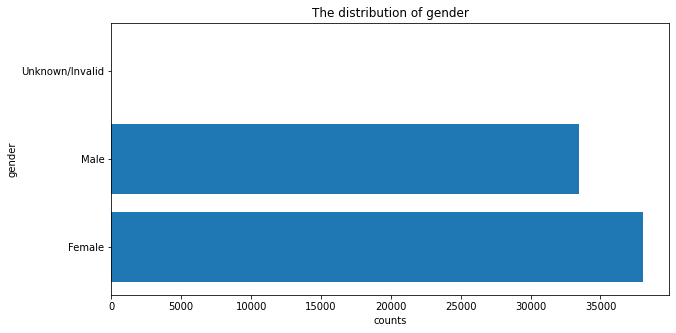

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64
**************************************************


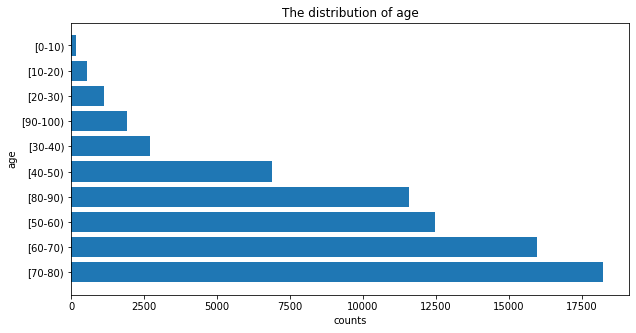

[70-80)     18210
[60-70)     15960
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: age, dtype: int64
**************************************************


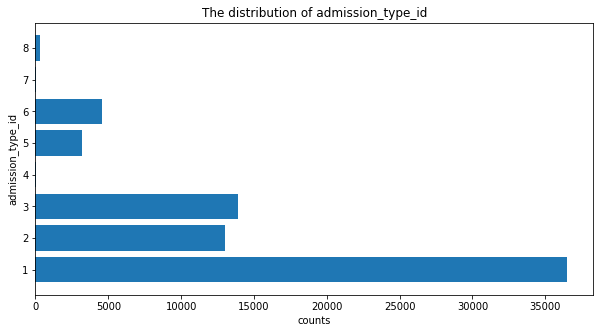

1    36490
3    13917
2    13028
6     4588
5     3174
8      291
7       21
4        9
Name: admission_type_id, dtype: int64
**************************************************


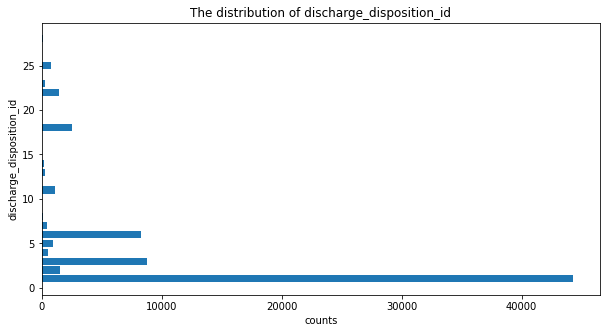

1     44317
3      8784
6      8289
18     2474
2      1539
22     1410
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64
**************************************************


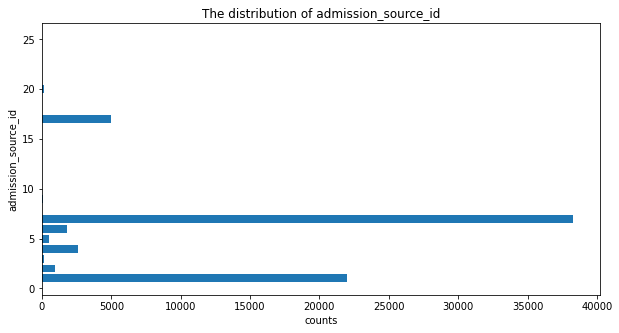

7     38290
1     22007
17     4949
4      2583
6      1801
2       926
5       545
20      155
3       138
9        95
8        12
10        7
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64
**************************************************


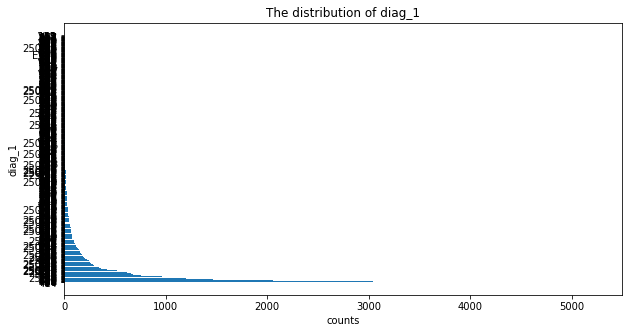

414    5233
428    3980
786    3040
410    2902
486    2439
       ... 
653       1
61        1
145       1
148       1
V51       1
Name: diag_1, Length: 696, dtype: int64
**************************************************


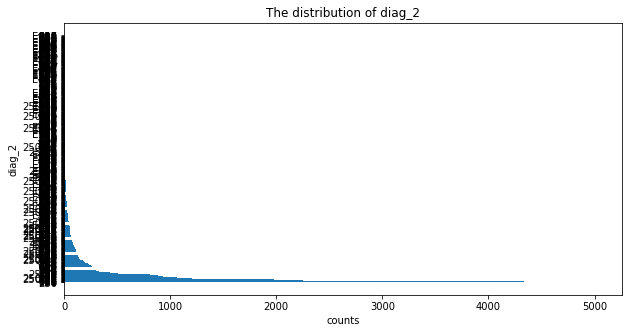

250     5009
276     4604
428     4335
427     3539
401     3088
        ... 
704        1
911        1
520        1
E890       1
927        1
Name: diag_2, Length: 725, dtype: int64
**************************************************


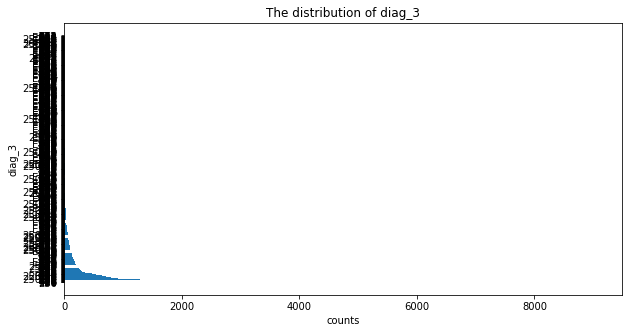

250     9039
401     6588
276     3448
428     2847
427     2707
        ... 
E882       1
243        1
171        1
754        1
971        1
Name: diag_3, Length: 758, dtype: int64
**************************************************


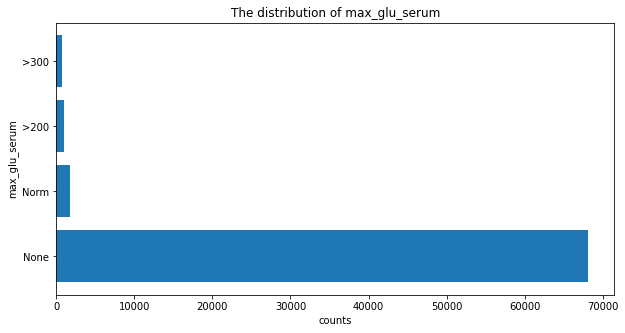

None    68062
Norm     1731
>200      969
>300      756
Name: max_glu_serum, dtype: int64
**************************************************


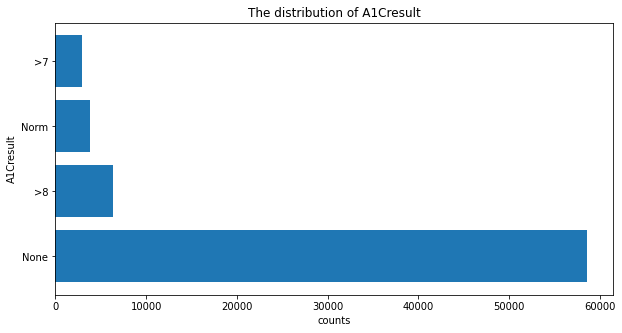

None    58532
>8       6304
Norm     3791
>7       2891
Name: A1Cresult, dtype: int64
**************************************************


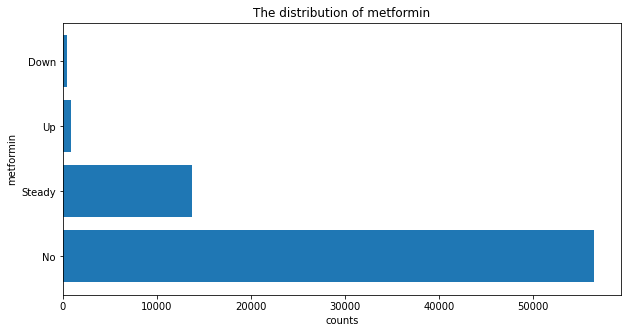

No        56527
Steady    13718
Up          838
Down        435
Name: metformin, dtype: int64
**************************************************


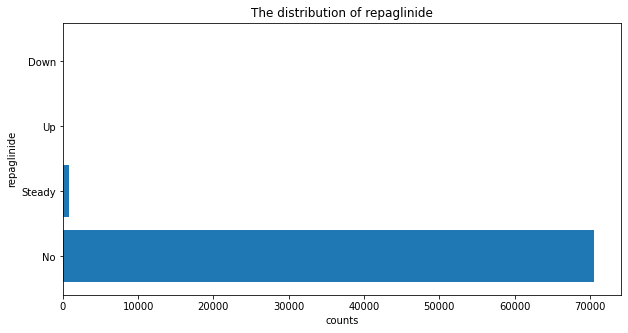

No        70592
Steady      824
Up           73
Down         29
Name: repaglinide, dtype: int64
**************************************************


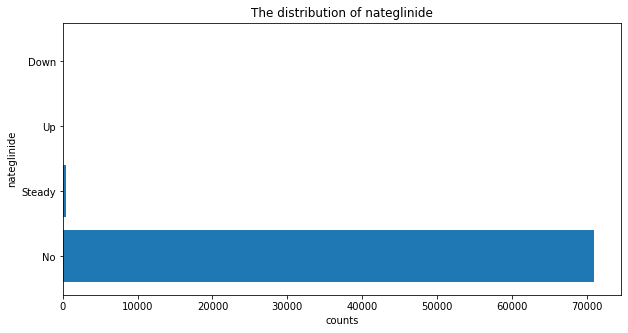

No        71020
Steady      474
Up           16
Down          8
Name: nateglinide, dtype: int64
**************************************************


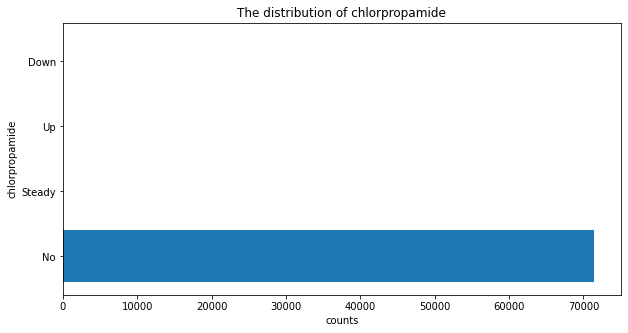

No        71446
Steady       67
Up            4
Down          1
Name: chlorpropamide, dtype: int64
**************************************************


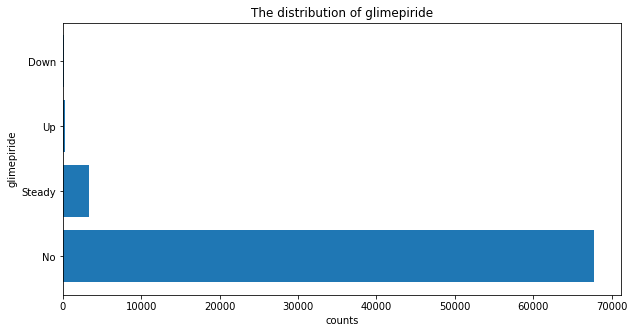

No        67773
Steady     3372
Up          235
Down        138
Name: glimepiride, dtype: int64
**************************************************


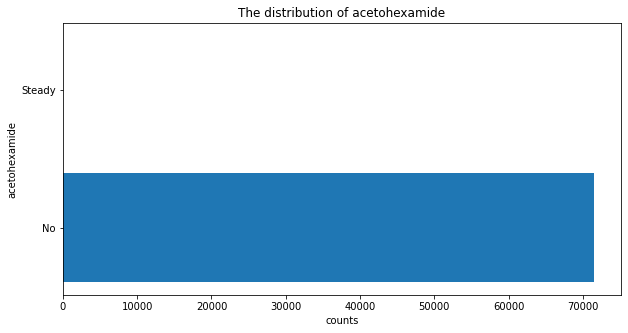

No        71517
Steady        1
Name: acetohexamide, dtype: int64
**************************************************


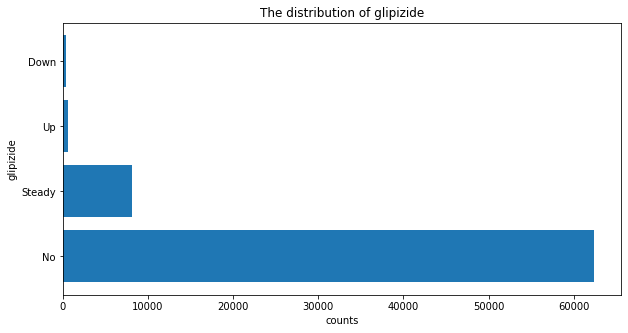

No        62412
Steady     8150
Up          578
Down        378
Name: glipizide, dtype: int64
**************************************************


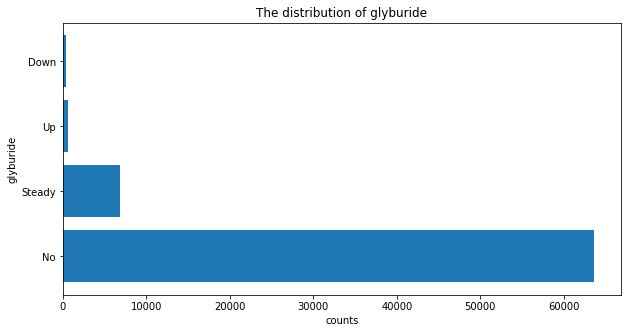

No        63664
Steady     6812
Up          621
Down        421
Name: glyburide, dtype: int64
**************************************************


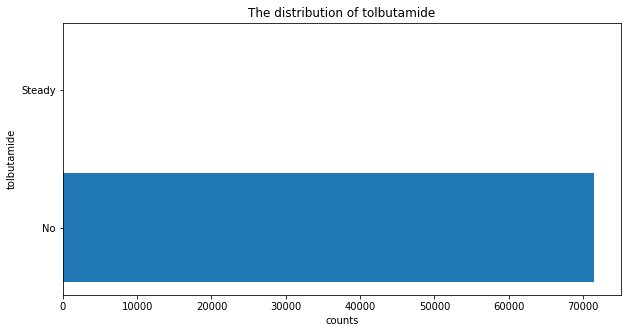

No        71499
Steady       19
Name: tolbutamide, dtype: int64
**************************************************


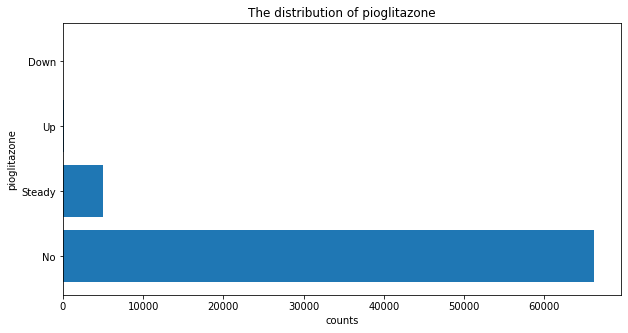

No        66210
Steady     5047
Up          180
Down         81
Name: pioglitazone, dtype: int64
**************************************************


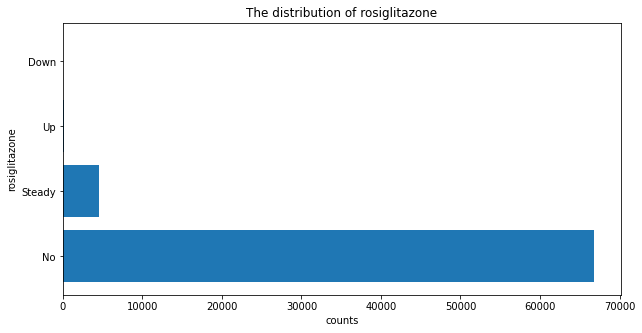

No        66817
Steady     4490
Up          136
Down         75
Name: rosiglitazone, dtype: int64
**************************************************


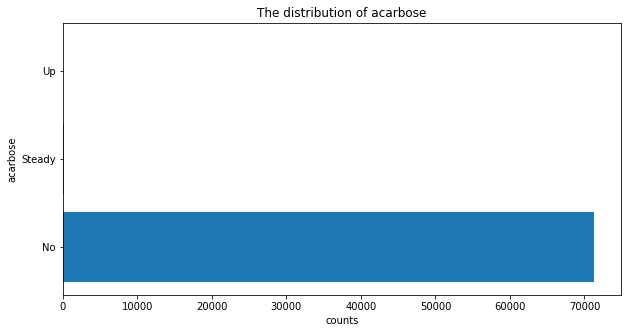

No        71316
Steady      192
Up           10
Name: acarbose, dtype: int64
**************************************************


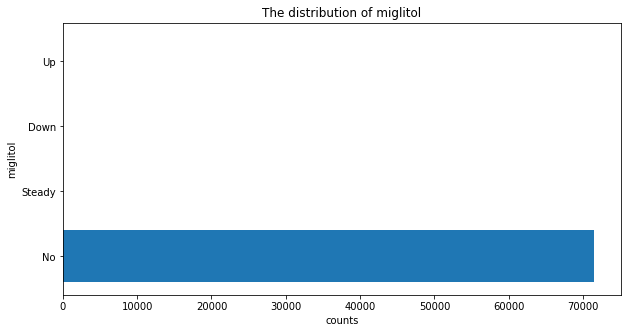

No        71498
Steady       18
Down          1
Up            1
Name: miglitol, dtype: int64
**************************************************


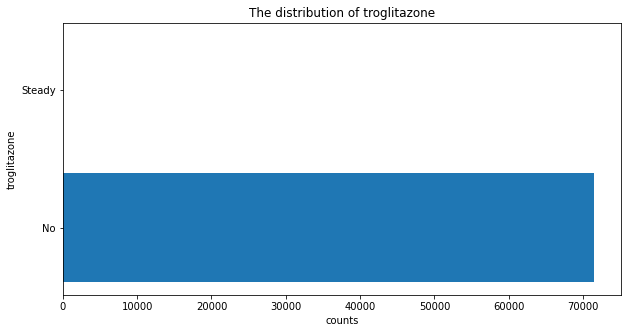

No        71515
Steady        3
Name: troglitazone, dtype: int64
**************************************************


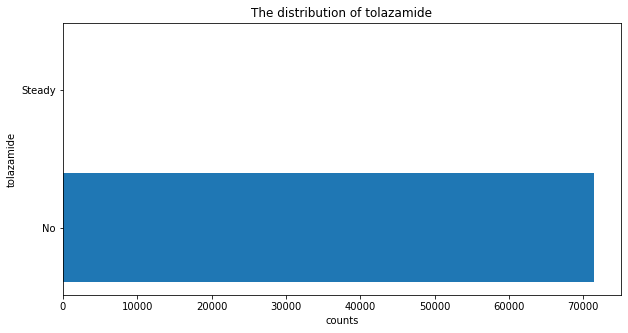

No        71488
Steady       30
Name: tolazamide, dtype: int64
**************************************************


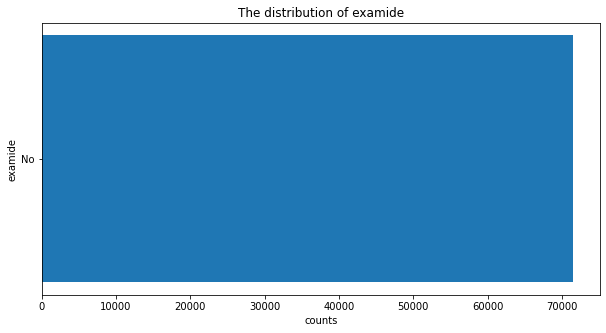

No    71518
Name: examide, dtype: int64
**************************************************


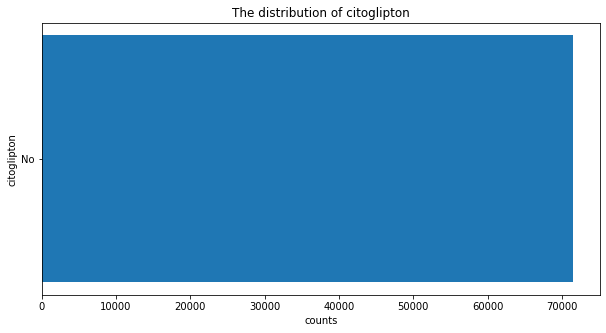

No    71518
Name: citoglipton, dtype: int64
**************************************************


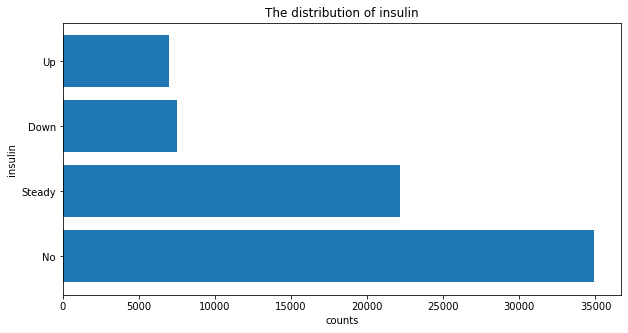

No        34921
Steady    22129
Down       7505
Up         6963
Name: insulin, dtype: int64
**************************************************


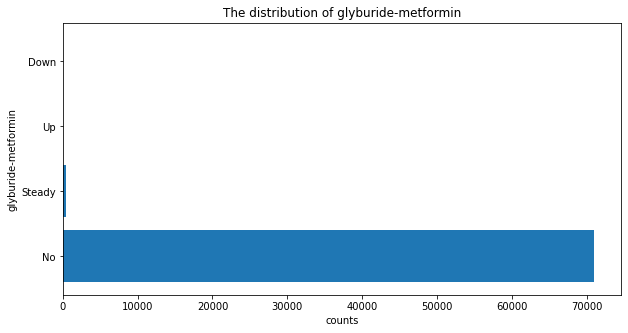

No        71016
Steady      491
Up            7
Down          4
Name: glyburide-metformin, dtype: int64
**************************************************


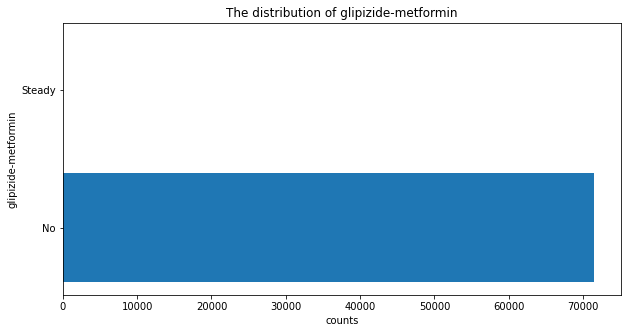

No        71511
Steady        7
Name: glipizide-metformin, dtype: int64
**************************************************


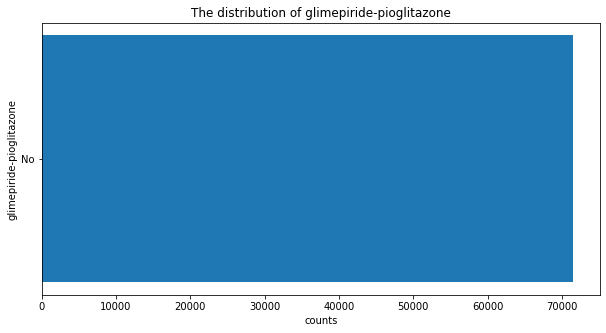

No    71518
Name: glimepiride-pioglitazone, dtype: int64
**************************************************


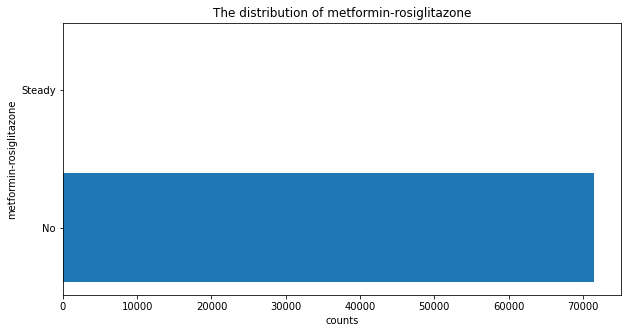

No        71516
Steady        2
Name: metformin-rosiglitazone, dtype: int64
**************************************************


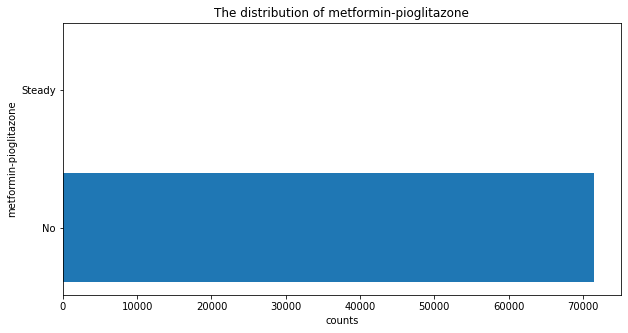

No        71517
Steady        1
Name: metformin-pioglitazone, dtype: int64
**************************************************


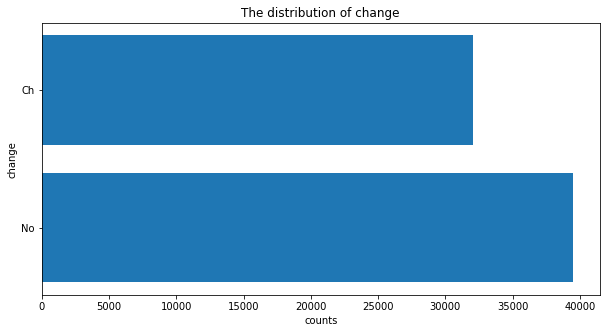

No    39494
Ch    32024
Name: change, dtype: int64
**************************************************


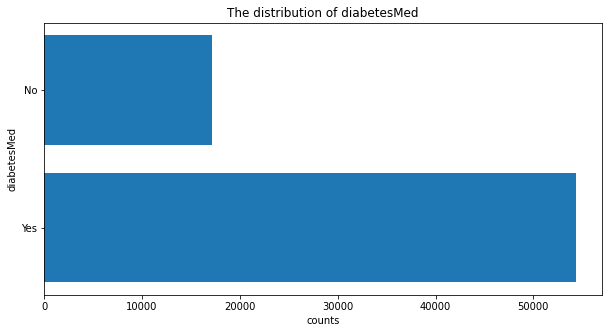

Yes    54319
No     17199
Name: diabetesMed, dtype: int64
**************************************************


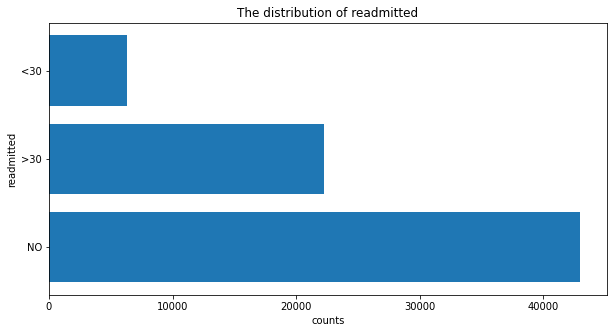

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64
**************************************************


In [ ]:
# To check the distribution of categorical variables
categorical_var = diabetic_df.select_dtypes('object').drop(['encounter_id','patient_nbr'],axis=1)
for col in categorical_var:  
    plt.figure(figsize=(10,5))
    plt.barh(categorical_var[col].value_counts().index,categorical_var[col].value_counts().values)
    plt.xlabel('counts')
    plt.ylabel(f'{col}')
    plt.title(f'The distribution of {col}')
    plt.show()
    print(categorical_var[col].value_counts())
    print('*'*50)

# My Findings for categorical features
* Most patients in our dataset were caucasians, followed by African Americans.

* The number of female patient was slightly higher than the number of male patient.

* From the dataset, it seems like older people are more likely to be readmitted to hospital due to diabetes.

* There were so many different diag codes in the dataset, unable to read from graphs

* Almost all patients had 'None' for max_glu_serum(glu_serum stands for blood_sugar level. Blood sugar levels above 16.7 mmol/L (300 mg/dL) can cause fatal reactions) My guess is that the blood sugar level was not taken at the time they were admitted to hospital. 

* Almost all patients had 'None' for all the tests. My guess is that these tests were not taken at the time they were admitted to hospital. 

* Almost all patients had 'No' for the medication for diabetes they are taking except for insulin. Most patients did not have insulin, followed by the patients who's having the normal insulin dosage. There were some patients who's having increasing or descreasing insulin dosage.

* Most patients had disbetic medication prescribed.

* Most patients were not readmitted to hospital after the first encounter, Imbalanced dataset may cause issues for modeling.

* Drop examide and citoglipton since they only have one distinct value 'No'

* Drop chlorpropamide, acetohexamide, tolbutamide,acarbose,miglitol,troglitazone, tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone and metformin-pioglitazone since more than 90% values are "none" Meaning the medication was not taken by the patient.

* The top 3 admission types were emergency,urgent, and elective.

* The majority of patients were dicharged to home, followed by the patients who were transferred to a short_term hospital for inpatient care.



In [ ]:
diabetic_df.drop(['examide','citoglipton','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True)

"discharge_disposition_id" tells us where the patient went after the encounter. discharge disposition code 10-21 are related to death and these patients should be removed from our dataset since they cannot be readmitted

In [ ]:
diabetic_df = diabetic_df.loc[~diabetic_df.discharge_disposition_id.isin(list(range(10,22)))]

In [ ]:
# to make sure these observations have been removed
diabetic_df.discharge_disposition_id.value_counts().sort_index()

1     44317
2      1539
3      8784
4       541
5       913
6      8289
7       409
8        73
9         9
22     1410
23      260
24       25
25      778
27        3
28       90
Name: discharge_disposition_id, dtype: int64

Since there are so many different diag codes in the dataset which makes the bar chart hard to read. I decided to union
diag code 1, diag codes 2 and diag code 3 and plot out the top 10 most commo diag codes.

In [ ]:
diag_codes = pd.concat([diabetic_df.diag_1,diabetic_df.diag_2,diabetic_df.diag_3]).value_counts().head(10)

print('Top 10 most common diag codes')
print(diag_codes)
print('Top 10 most common diag codes by percentage')
print(pd.concat([diabetic_df.diag_1,diabetic_df.diag_2,diabetic_df.diag_3]).value_counts(normalize=True).mul(100).round(2).head(10))

Top 10 most common diag codes
250    13548
428    10417
401     9432
414     9222
276     8807
427     7743
599     4310
786     3739
496     3641
486     3431
dtype: int64
Top 10 most common diag codes by percentage
250    6.75
428    5.19
401    4.70
414    4.59
276    4.39
427    3.86
599    2.15
786    1.86
496    1.81
486    1.71
dtype: float64


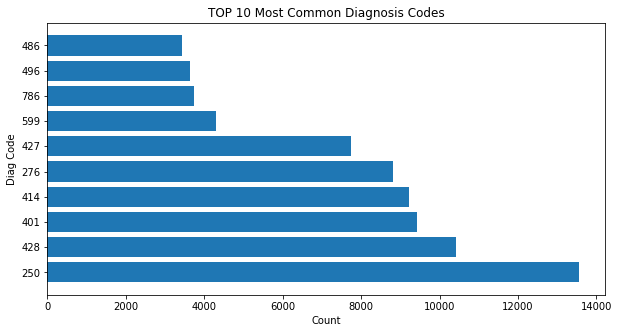

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(diag_codes.index,diag_codes.sort_values(ascending=False))
plt.xlabel('Count')
plt.ylabel('Diag Code')
plt.title('TOP 10 Most Common Diagnosis Codes')
plt.show()

# TOP 10 Most Common Diagnosis Codes for diabetes
* 428 - Heart failure
* 250 - Diabetes mellitus
* 276 - Disorders of fluid electrolyte and acid-base balance.
* 414 - Other forms of chronic ischemic heart disease.
* 401 - Essential hypertension
* 427 - Cardiac dysrhythmias
* 599 - Other disorders of urethra and urinary tract
* 496 - Chronic airway obstruction
* 403 - Hypertensive chronic kidney disease.
* 486 - Pneumonia, organism unspecified

Top 10 most common disgnosis codes only contributed 36% of total number of unique diagnosis codes so I cannot use these 10 codes to represent all the diagnosis codes. I decided to regroup diagnosis codes into 9 disease categories based on the breakdown below.

| ICD-9 Codes | Descriptions                                                                                                |   |   |   |
|-------------|-------------------------------------------------------------------------------------------------------------|---|---|---|
|     001-139 | Infectious And Parasitic Diseases                                                                           |   |   |   |
| 140-239     | Neoplasms                                                                                                   |   |   |   |
| 240-279     | Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorder                                        |   |   |   |
| 280-289     | Diseases Of The Blood And Blood-Forming Organs                                                              |   |   |   |
| 290-319     | Mental Disorders                                                                                            |   |   |   |
| 320-389     | Diseases Of The Nervous System And Sense Organs                                                             |   |   |   |
| 390-459     | Diseases Of The Circulatory System                                                                          |   |   |   |
| 460-519     | Diseases Of The Respiratory System                                                                          |   |   |   |
| 520-579     | Diseases Of The Digestive System                                                                            |   |   |   |
| 580-629     | Diseases Of The Genitourinary System                                                                        |   |   |   |
| 630-679     | Complications Of Pregnancy, Childbirth, And The Puerperium                                                  |   |   |   |
| 680-709     | Diseases Of The Skin And Subcutaneous Tissue                                                                |   |   |   |
| 710-739     | Diseases Of The Musculoskeletal System And Connective Tissue                                                |   |   |   |
| 740-759     | Congenital Anomalies                                                                                        |   |   |   |
| 760-779     | Certain Conditions Originating In The Perinatal Period                                                      |   |   |   |
| 780-799     | Symptoms, Signs, And Ill-Defined Conditions                                                                 |   |   |   |
| 800-999     | Injury And Poisoning                                                                                        |   |   |   |
| V01-V91     | Supplementary Classification Of Factors Influencing Health Health Status   And Contact With Health Services |   |   |   |
| E000-E999   | Supplementary Classification Of External Causes Of Injury and Poisioning    

In [ ]:
def map_diagnosis(df, cols):
    for col in cols:
        df.loc[(df[col].str.contains("V")) | (df[col].str.contains("E")), col] = -1
        df[col] = df[col].astype(np.float16)

    for col in cols:
        df["temp_diag"] = np.nan
        df.loc[(df[col]>=390) & (df[col]<=459) | (df[col]==785), "temp_diag"] = "Circulatory"
        df.loc[(df[col]>=460) & (df[col]<=519) | (df[col]==786), "temp_diag"] = "Respiratory"
        df.loc[(df[col]>=520) & (df[col]<=579) | (df[col]==787), "temp_diag"] = "Digestive"
        df.loc[(df[col]>=250) & (df[col]<251), "temp_diag"] = "Diabetes"
        df.loc[(df[col]>=800) & (df[col]<=999), "temp_diag"] = "Injury"
        df.loc[(df[col]>=710) & (df[col]<=739), "temp_diag"] = "Muscoloskeletal"
        df.loc[(df[col]>=580) & (df[col]<=629) | (df[col] == 788), "temp_diag"] = "Genitourinary"
        df.loc[(df[col]>=140) & (df[col]<=239), "temp_diag"] = "Neoplasms"

        df["temp_diag"] = df["temp_diag"].fillna("Other")
        df[col] = df["temp_diag"]
        df = df.drop("temp_diag", axis=1)

    return df


In [ ]:
diabetic_df = map_diagnosis(diabetic_df,["diag_1","diag_2","diag_3"])

In [ ]:
diag_code_stack = pd.concat([diabetic_df.diag_1,diabetic_df.diag_2,diabetic_df.diag_3]).value_counts().sort_values()

In [ ]:
# add a new feature to indicate if a patient has diabetes as its diag codes or note
diabetic_df['diabetes']= diabetic_df.diag_1.str.contains('Diabetes')|diabetic_df.diag_2.str.contains('Diabetes')|diabetic_df.diag_3.str.contains('Diabetes')

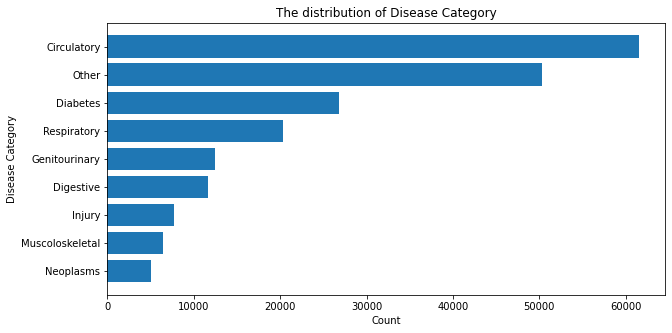

In [ ]:
# plot out the distribution
plt.figure(figsize=(10,5))
plt.barh(diag_code_stack.index,diag_code_stack.values)
plt.xlabel('Count')
plt.ylabel('Disease Category')
plt.title('The distribution of Disease Category')
plt.show()

Circulatory, Other and Diabetes appear to be the most common diagnosis codes for diabetes. I decided to drop diag code 2 and diag code 3 and only keep the primary diag code for analysis. 

In [ ]:
diabetic_df.drop(['diag_2','diag_3'],axis=1,inplace=True)

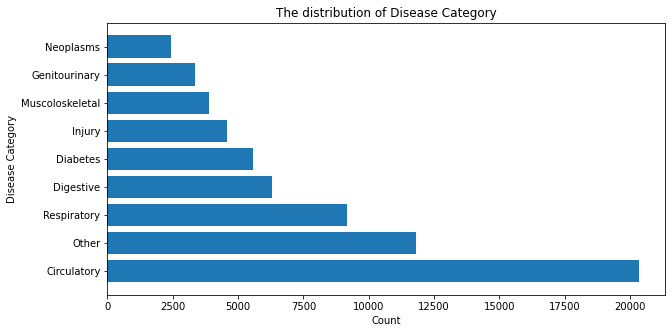

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(diabetic_df.diag_1.value_counts().index,diabetic_df.diag_1.value_counts().values)
plt.xlabel('Count')
plt.ylabel('Disease Category')
plt.title('The distribution of Disease Category')
plt.show()

Majority of "Other" are E and V codes which are related to external causes of injury. 

Converting age groups into numerical variables. I think it's appropriate to convert [0-10] to the midpoint 5

In [ ]:
#age
age = {'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95}
diabetic_df['age']=diabetic_df['age'].replace(age)

There are so many distinct values in "admission source" and "discharge type", I will regroup them into categories

In [ ]:
print(diabetic_df.admission_source_id.value_counts())
print('*'*50)
print(diabetic_df.admission_type_id.value_counts())
print('*'*50)
print(diabetic_df.discharge_disposition_id.value_counts())

7     36027
1     21021
17     4804
4      2177
6      1768
2       842
5       450
20      153
9        95
3        75
8        11
10        7
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64
**************************************************
1    34105
3    13039
2    12398
6     4503
5     3077
8      291
7       18
4        9
Name: admission_type_id, dtype: int64
**************************************************
1     44317
3      8784
6      8289
2      1539
22     1410
5       913
25      778
4       541
7       409
23      260
28       90
8        73
24       25
9         9
27        3
Name: discharge_disposition_id, dtype: int64


In [ ]:
# admission_source_id
admission_source = {1:"Referral",2:"Referral",3:"Referral",4:"Other",5:"Other",6:"Other",7:"Emergency",8:"Other",9:"Other",10:"Other",11:"Other",13:"Other",14:"Other",17:"Not Available",20:"Not Available",22:"Other",25:"Other"}
diabetic_df['admission_source_id']=diabetic_df['admission_source_id'].replace(admission_source)

In [ ]:
# admission_type_id
admission_type = {1.0:"Emergency",2.0:"Emergency",3.0:"Elective",4.0:"New Born",5.0:"Not Available",6.0:'Not Available',7.0:"Trauma Center",8.0:"Not Available"}
diabetic_df['admission_type_id']=diabetic_df['admission_type_id'].replace(admission_type)

In [ ]:
# discharge_disposition_id
discharge = {1:"Discharged to Home",2:"Discharged/transferred to another short term hospital",3:"Discharged/transferred to SNF",4:"Discharged/transferred to ICF",5:"Discharged/transferred to another type of inpatient care institution",6:"Discharged to Home",7:"Left AMA",8:"Discharged to Home",9:"Admitted as an inpatient to this hospital",10:"Neonate discharged to another hospital for neonatal aftercare",11:"Expired",12:"Still patient or expected to return for outpatient services",13:"Discharged to Home",14:"Hospice / medical facility",15:"Discharged/transferred within this institution to Medicare approved swing bed",16:"Discharged/transferred/referred another institution for outpatient services",17:"Discharged/transferred/referred to this institution for outpatient services",18:"Not Available",19:"Discharged to Home",20:"Expired in a medical facility. Medicaid only, hospice.",21:"Expired, place unknown. Medicaid only, hospice.",22:"Discharged/transferred to another rehab fac including rehab units of a hospital .",23:"Discharged/transferred to a long term care hospital.",24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",25:"Not Available",26:"Not Available",27:"Discharged/transferred to a federal health care facility.",28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",29:"Discharged/transferred to a Critical Access Hospital (CAH)",30:"Other"}
diabetic_df['discharge_disposition_id']=diabetic_df['discharge_disposition_id'].replace(discharge)

We just wrapped up EDA for categorical features and let's proceed to numerical features

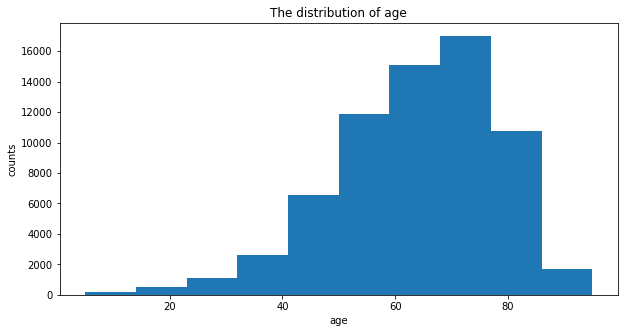

**************************************************


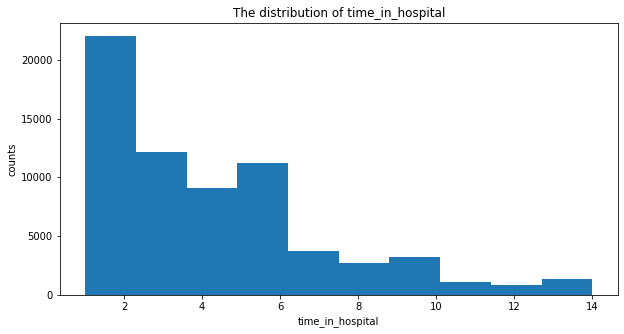

**************************************************


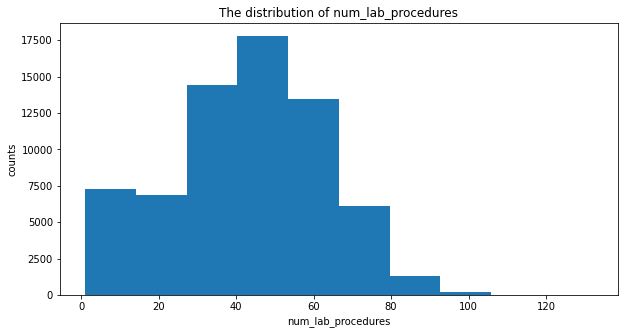

**************************************************


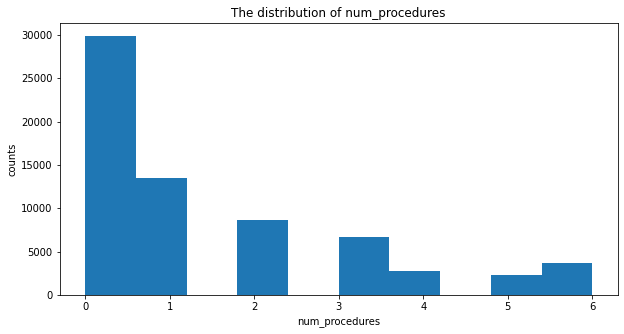

**************************************************


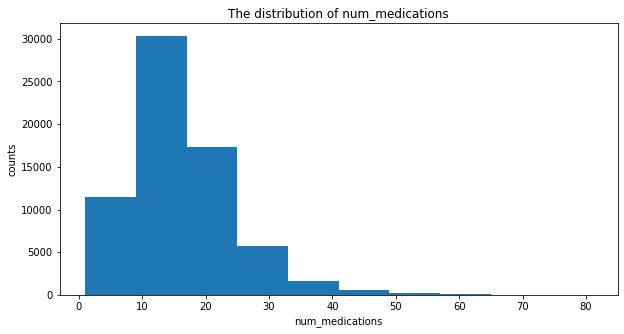

**************************************************


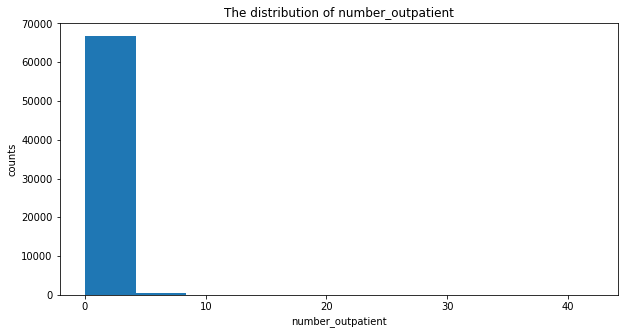

**************************************************


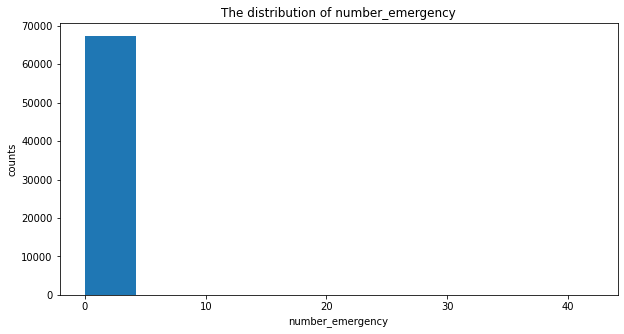

**************************************************


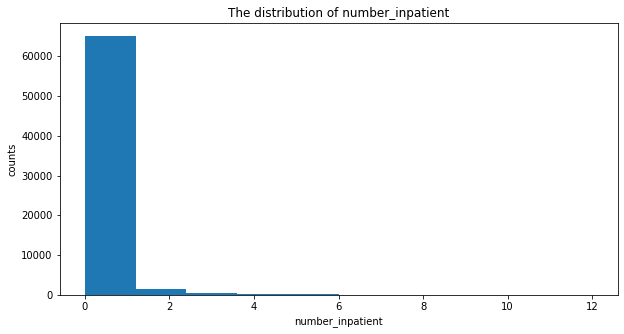

**************************************************


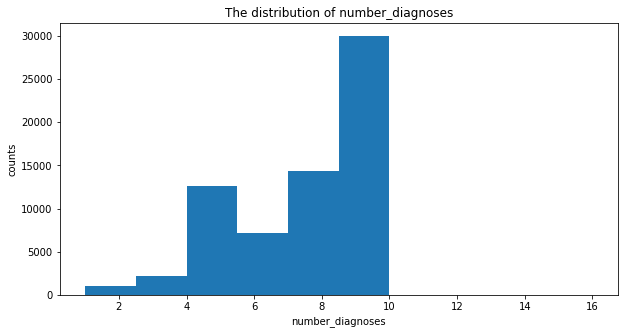

**************************************************


In [ ]:
# To check the distribution of numerical features
numerical_var = diabetic_df.select_dtypes('int64')
for col in numerical_var:
    plt.figure(figsize=(10,5))
    plt.hist(numerical_var[col])
    plt.xlabel(f'{col}')
    plt.ylabel('counts')
    plt.title(f'The distribution of {col}')
    plt.show()
    print('*'*50)

In [ ]:
numerical_var.describe().T

,count,mean,std,min,25%,50%,75%,max
age,67440.0,65.415925,16.042967,5.0,55.0,65.0,75.0,95.0
time_in_hospital,67440.0,4.245033,2.918217,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,67440.0,42.901942,20.019584,1.0,31.0,44.0,57.0,132.0
num_procedures,67440.0,1.412782,1.747978,0.0,0.0,1.0,2.0,6.0
num_medications,67440.0,15.636254,8.214127,1.0,10.0,14.0,20.0,81.0
number_outpatient,67440.0,0.288968,1.080973,0.0,0.0,0.0,0.0,42.0
number_emergency,67440.0,0.107355,0.520388,0.0,0.0,0.0,0.0,42.0
number_inpatient,67440.0,0.180664,0.609863,0.0,0.0,0.0,0.0,12.0
number_diagnoses,67440.0,7.247791,1.996335,1.0,6.0,8.0,9.0,16.0


# My Findings for numerical features

* Most patients were discharged from hospital within two days. The longest length of inpatient stay was 14 days.

* Half patients had less than 44 lab procedures. The min and max in our dataset were 1 and 132 respectively.

* Most patients had 0 or 1 procedures.

* Most patients had around 10 diagnosis.


# Explore the relationship between dependent variable (if re-admitted in 30 days) and independent variables by visualizations

In [ ]:
#Since my goal is to identify the patients with higher risk for hospital re-admission witin in 30 days, I decided to encode no readmission and re-admitted after 30 days as 0 and re-admitted within 30 days as 1
diabetic_df['readmitted']=diabetic_df['readmitted'].map({'>30':0,'<30':1,'NO':0})

In [ ]:
# rename the header to avoid misleading the audience
diabetic_df.rename({'readmitted':'readmitted_in_30_days'},axis=1,inplace=True)

In [ ]:
for col in categorical_var:
    print(f'{col}')
    print(diabetic_df.groupby(categorical_var[col]).readmitted_in_30_days.value_counts(normalize=True).mul(100).unstack())
    print('*'*50)

race
readmitted_in_30_days          0         1
race                                      
AfricanAmerican        91.549996  8.450004
Asian                  91.458333  8.541667
Caucasian              90.844582  9.155418
Hispanic               92.210526  7.789474
Other                  92.831065  7.168935
**************************************************
gender
readmitted_in_30_days           0         1
gender                                     
Female                  91.047104  8.952896
Male                    91.144017  8.855983
Unknown/Invalid        100.000000       NaN
**************************************************
age
readmitted_in_30_days          0          1
age                                        
[0-10)                 98.039216   1.960784
[10-20)                95.121951   4.878049
[20-30)                92.558984   7.441016
[30-40)                93.073096   6.926904
[40-50)                92.772368   7.227632
[50-60)                92.836147   7.163853
[60-70)  

In [ ]:
diabetic_df.readmitted_in_30_days.value_counts(normalize=True)[1]

0.0890717674970344

only 9% readmission rate in our dataset

In [ ]:
categorical_var = diabetic_df.select_dtypes('object').drop(['encounter_id','patient_nbr'],axis=1)

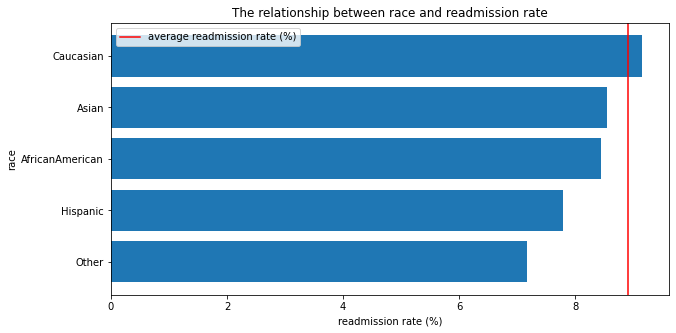

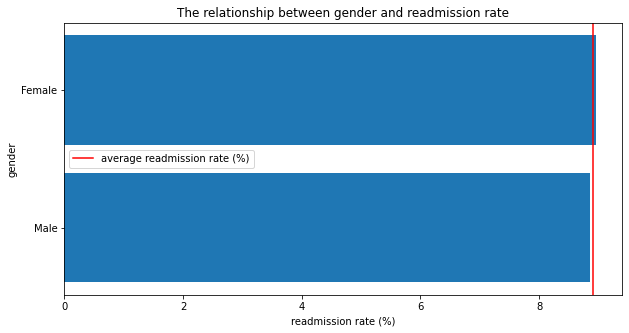

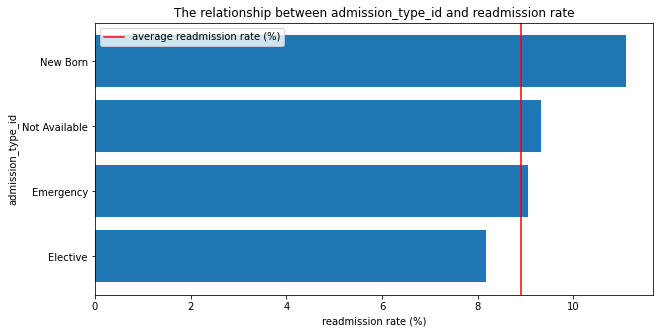

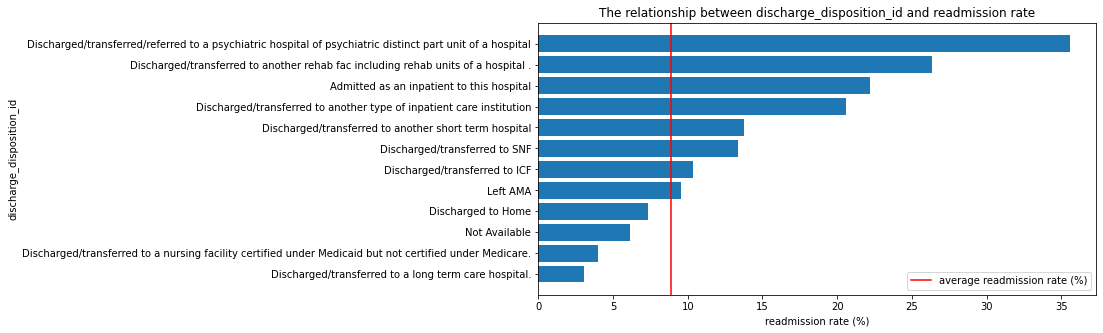

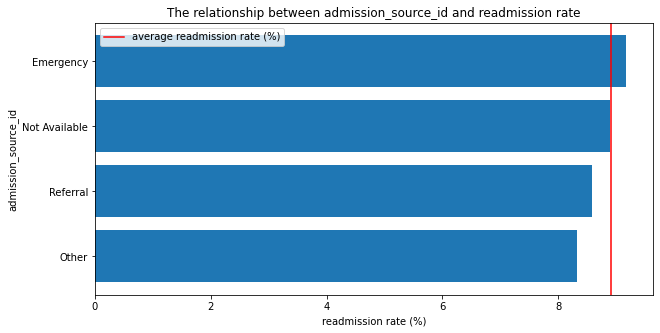

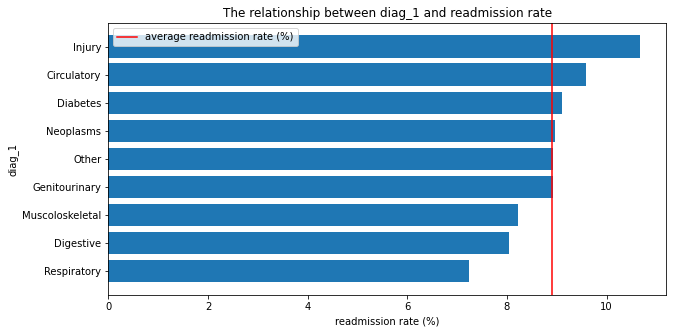

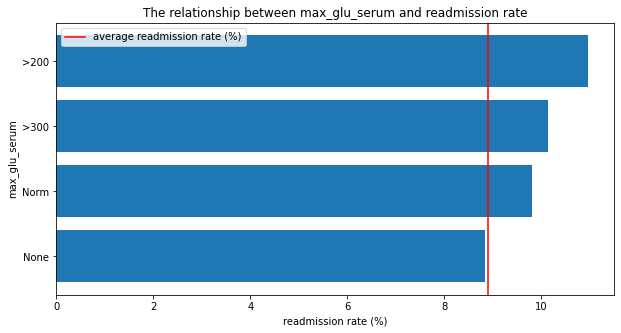

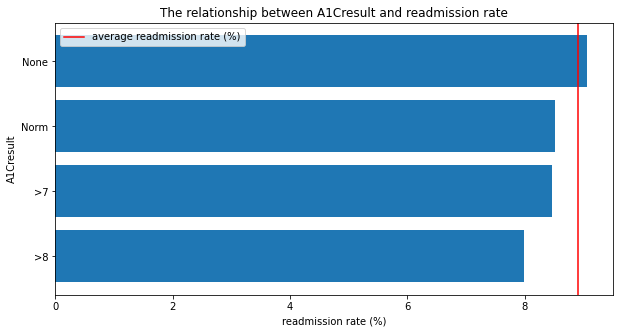

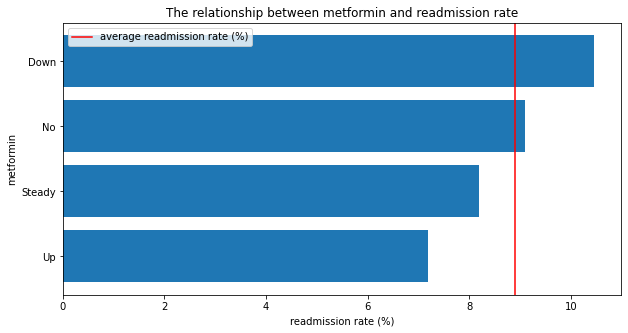

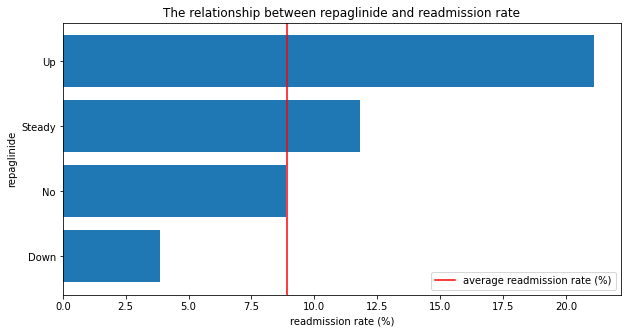

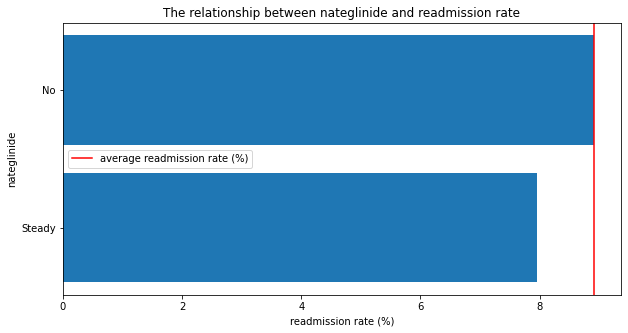

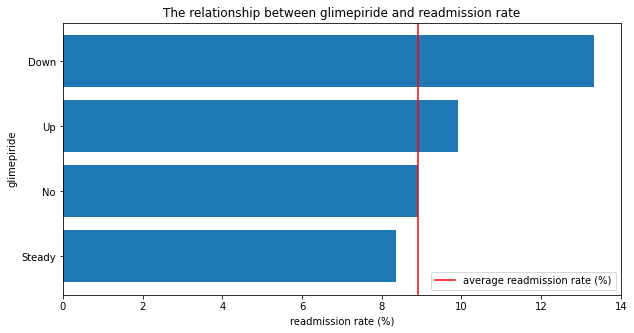

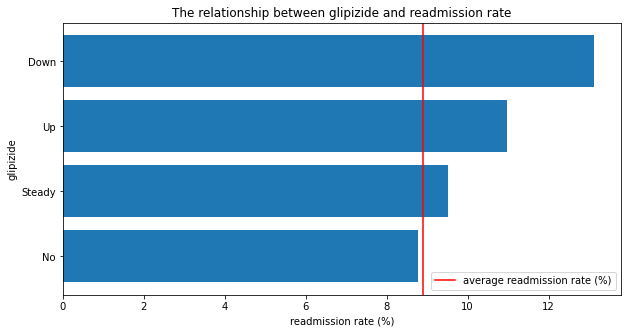

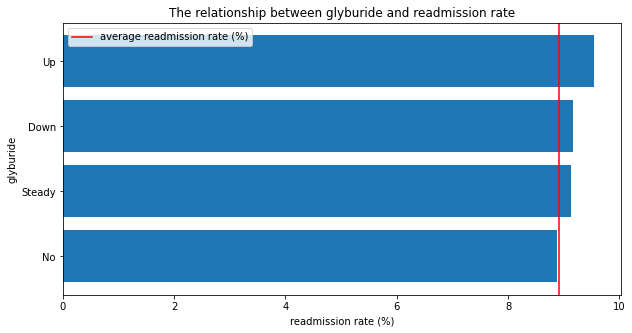

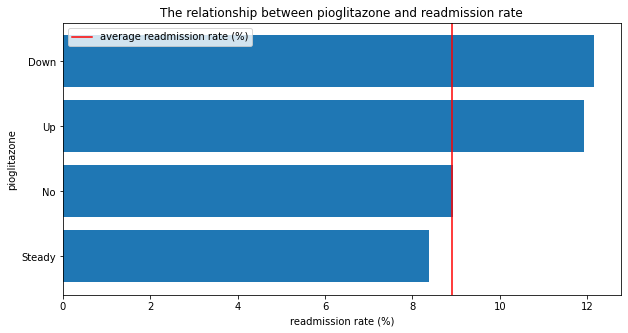

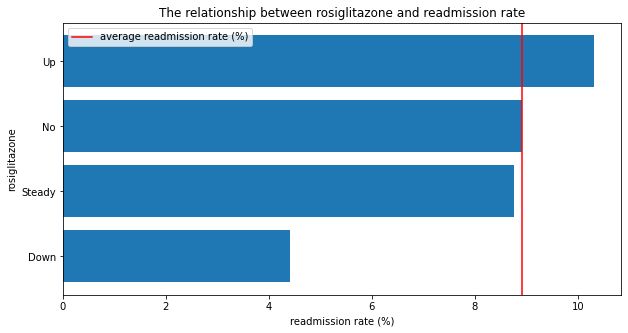

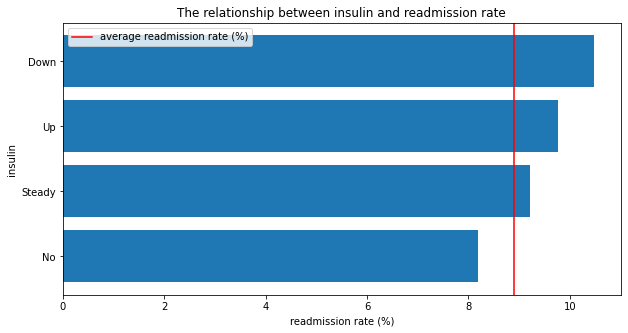

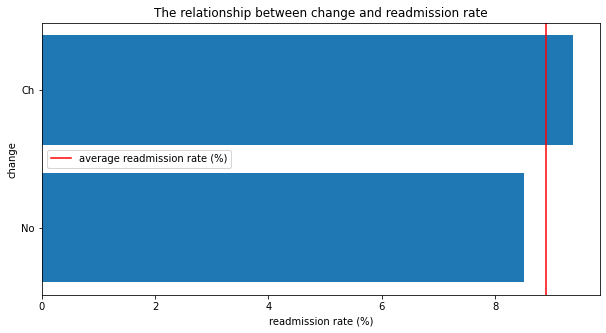

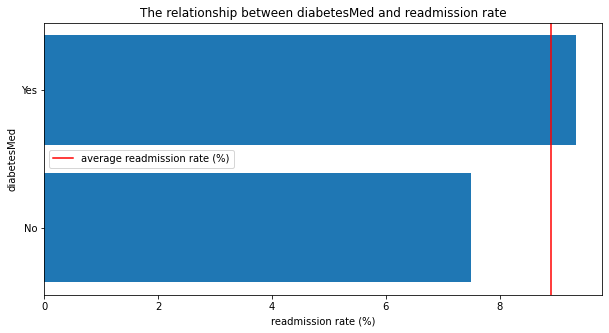

In [ ]:
for col in categorical_var:
    cat_readmitted = diabetic_df.groupby(categorical_var[col]).readmitted_in_30_days.value_counts(normalize=True).mul(100).unstack().sort_values(by=1,ascending=True)
    plt.figure(figsize=(10,5))
    plt.barh(cat_readmitted.index,cat_readmitted[1])
    plt.xlabel('readmission rate (%)')
    plt.ylabel(f'{col}')
    plt.axvline(diabetic_df.readmitted_in_30_days.value_counts(normalize=True)[1]*100,c='r',label='average readmission rate (%)')
    plt.title(f'The relationship between {col} and readmission rate')
    plt.legend()


    plt.show()

In [ ]:
diabetic_df.groupby('readmitted_in_30_days').admission_type_id.value_counts()

readmitted_in_30_days  admission_type_id
0                      Emergency            42297
                       Elective             11973
                       Not Available         7137
                       Trauma Center           18
                       New Born                 8
1                      Emergency             4206
                       Elective              1066
                       Not Available          734
                       New Born                 1
Name: admission_type_id, dtype: int64

# My findings
* It appears that Caucasian and African American are more likely to be readmitted to hospital. Might be biased since there are fewer Hispanic, asian and other race in our dataset.

* The likelihood a female will be readmitted to hospital is higher than male.

* It appears that max_glu has strong effect on readmission rate. The higher the max_glus, the more likely to get into hospital again.

* A1Cresult doesn't seem to be relevant to the readmission rate. But A1Cresults were not taken for majority of patients so it might not represent the whole picture.

* It appears that the following medications have effect on readmission rate: metformin,glimerpiride,glipizide, pioglitazone, acarbose, miglitor, insulin, glyburide-metformin. The patient had lower dosage when they were admitted to hospital for the first time.

* It appears that repaglinide also has effect on remission rate. The patient had higher dosage when they were admitted to hospital for the first time.

* The patients with more number of lab procedures are more likely to be readmitted in hospital.

* The patients with more number of medications are more likely to be readmitted in hospital.

* The patients had more number of inpatient visits preceding to the encounter are more likely to be readmitted in hospital.

* One thing to notes is that New born appears to have the highest re-admission rate, that is because we only have a few new born records in the dataset(1 out of 7 newborns was readmitted to hospital) That does not represent the population


In [ ]:
# Take a look at the categorical variables before we convert all of them into dummies
categorical_var = diabetic_df.select_dtypes('object')
for col in categorical_var:
    print(f'The feature name is {col}')
    print(categorical_var[col].value_counts())
    print('*'*50)

The feature name is encounter_id
2278392      1
180904386    1
180909012    1
180910230    1
180911874    1
            ..
106150212    1
106151562    1
106154184    1
106155144    1
443867222    1
Name: encounter_id, Length: 67440, dtype: int64
**************************************************
The feature name is patient_nbr
8222157      1
42471099     1
24324984     1
86024700     1
5785695      1
            ..
61583247     1
34018497     1
23785227     1
8568108      1
175429310    1
Name: patient_nbr, Length: 67440, dtype: int64
**************************************************
The feature name is race
Caucasian          50451
AfricanAmerican    12071
Other               3013
Hispanic            1425
Asian                480
Name: race, dtype: int64
**************************************************
The feature name is gender
Female             35899
Male               31538
Unknown/Invalid        3
Name: gender, dtype: int64
**************************************************
Th

In [ ]:
diabetic_df.select_dtypes('object').T

,0,1,2,3,4,5,6,7,8,9,...,101748,101749,101751,101752,101753,101754,101755,101756,101758,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443811536,443816024,443835140,443835512,443841992,443842016,443842022,443842070,443842340,443867222
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,189481478,106392411,175326800,139605341,184875899,183087545,188574944,140199494,120975314,175429310
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Caucasian,Caucasian,Caucasian,Other,Other,Caucasian,Other,Other,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Male,Female,Male,Female,Female,Female,Female,Male
admission_type_id,Not Available,Emergency,Emergency,Emergency,Emergency,Emergency,Elective,Emergency,Emergency,Elective,...,Emergency,Elective,Elective,Elective,Emergency,Emergency,Emergency,Emergency,Emergency,Emergency
discharge_disposition_id,Not Available,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged/transferred to SNF,...,Discharged/transferred to ICF,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Referral,Emergency,Emergency,Emergency,Emergency,Referral,Referral,Emergency,Other,Other,...,Emergency,Referral,Referral,Referral,Emergency,Emergency,Emergency,Emergency,Emergency,Emergency
diag_1,Diabetes,Other,Other,Other,Neoplasms,Circulatory,Circulatory,Circulatory,Circulatory,Circulatory,...,Other,Muscoloskeletal,Circulatory,Other,Diabetes,Digestive,Genitourinary,Injury,Other,Digestive
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,None,None,...,>7,Norm,Norm,None,None,>7,>8,None,None,None


* gender has two outcomes (3 observations show "unknown"), we can convert male into 1,female into 0 and unknown into 0
* change has two outcomes, we can convert ch into 1 and No into 0
* diabetesMed has two outcomes, we can convert Yes into 1 and No into 0
* for the testings: max_glu_serum and A1Cresult, we can regroup them into Normal(0),Abnormal(1) and Not Tested(-99)
* for the medications, we can regroup them into changed and no-change. I will encode "up" and 'down' to 1 and "steady" and "no" to 0
* For race, since we only have very few Hispanic, Asian and Other in our dataset (each less than 3%, range from 497-1517). I don't feel comfortable to derive insights from such small sample size so I will dummified Caucasian and AfricanAmerican only.

In [ ]:
diabetic_df['metformin']=diabetic_df['metformin'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['repaglinide']=diabetic_df['repaglinide'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['nateglinide']=diabetic_df['nateglinide'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['glimepiride']=diabetic_df['glimepiride'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['glipizide']=diabetic_df['glipizide'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['glyburide']=diabetic_df['glyburide'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['pioglitazone']=diabetic_df['pioglitazone'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['rosiglitazone']=diabetic_df['rosiglitazone'].map({'Steady':0,'Up':1,'Down':1,'No':0})
diabetic_df['insulin']=diabetic_df['insulin'].map({'Steady':0,'Up':1,'Down':1,'No':0})

In [ ]:
diabetic_df['A1Cresult']=diabetic_df['A1Cresult'].map({'>7':1,'>8':1,'Norm':0,'None':-99})
diabetic_df['max_glu_serum']=diabetic_df['max_glu_serum'].map({'>200':1,'>300':1,'Norm':0,'None':-99})

In [ ]:
diabetic_df['gender']=diabetic_df['gender'].map({'Male':1,'Female':0,'Unknown/Invalid':0})
diabetic_df['change']=diabetic_df['change'].map({'Ch':1,'No':0})
diabetic_df['diabetesMed']=diabetic_df['diabetesMed'].map({'Yes':1,'No':0})
diabetic_df['Caucasian']= diabetic_df['race'].map({'Caucasian':1,'AfricanAmerican':0,'Asian':0,'Other':0,'Hispanic':0})
diabetic_df['AfricanAmerican']= diabetic_df['race'].map({'AfricanAmerican':1,'Caucasian':0,'Asian':0,'Other':0,'Hispanic':0})
diabetic_df.drop('race',axis=1,inplace=True)

In [ ]:
# encounter_id and patient_nbr are just identifiers and not useful variables
diabetic_df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [ ]:
# Add new feature to enrich the dataset
diabetic_df['Service Utilization']=diabetic_df.number_outpatient + diabetic_df.number_emergency + diabetic_df.number_inpatient

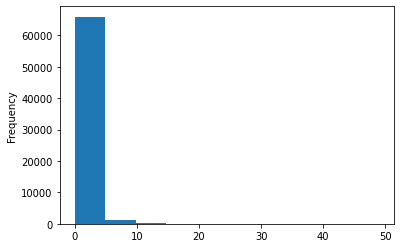

In [ ]:
diabetic_df['Service Utilization'].plot(kind='hist')

Service Utilization, number_emergency,number_inpatient and number_outpatient had high skew and kurtosis so I decide to log transform these features to normalize them

In [ ]:
diabetic_df['Service Utilization'] = np.log(diabetic_df['Service Utilization']+1)
diabetic_df['number_emergency'] = np.log(diabetic_df['number_emergency']+1)
diabetic_df['number_inpatient'] = np.log(diabetic_df['number_inpatient']+1)
diabetic_df['number_outpatient'] = np.log(diabetic_df['number_outpatient']+1)


In [ ]:
# Convert the above remaining categorical variables to dummies
df_for_model = pd.get_dummies(diabetic_df,columns =['admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diabetes'],drop_first=True)

In [ ]:
df_for_model.head().T

,0,1,2,3,4
gender,0.0,0.0,0.000000,1.0,1.0
age,5.0,15.0,25.000000,35.0,45.0
time_in_hospital,1.0,3.0,2.000000,2.0,1.0
num_lab_procedures,41.0,59.0,11.000000,44.0,51.0
num_procedures,0.0,0.0,5.000000,1.0,0.0
num_medications,1.0,18.0,13.000000,16.0,8.0
number_outpatient,0.0,0.0,1.098612,0.0,0.0
number_emergency,0.0,0.0,0.000000,0.0,0.0
number_inpatient,0.0,0.0,0.693147,0.0,0.0
number_diagnoses,1.0,9.0,6.000000,7.0,5.0


In [ ]:
df_for_model.rename({'diabetes_True':'diabetes'},axis=1,inplace=True)

In [ ]:
df_for_model.shape

(67440, 55)

In [ ]:
df_for_model.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,67440.0,0.467645,0.498956,0.0,0.0,0.0,1.000000,1.000000
age,67440.0,65.415925,16.042967,5.0,55.0,65.0,75.000000,95.000000
time_in_hospital,67440.0,4.245033,2.918217,1.0,2.0,3.0,6.000000,14.000000
num_lab_procedures,67440.0,42.901942,20.019584,1.0,31.0,44.0,57.000000,132.000000
num_procedures,67440.0,1.412782,1.747978,0.0,0.0,1.0,2.000000,6.000000
num_medications,67440.0,15.636254,8.214127,1.0,10.0,14.0,20.000000,81.000000
number_outpatient,67440.0,0.138274,0.385042,0.0,0.0,0.0,0.000000,3.761200
number_emergency,67440.0,0.062524,0.232703,0.0,0.0,0.0,0.000000,3.761200
number_inpatient,67440.0,0.103428,0.299480,0.0,0.0,0.0,0.000000,2.564949
number_diagnoses,67440.0,7.247791,1.996335,1.0,6.0,8.0,9.000000,16.000000


In [ ]:
# Perform a Chi Square test to explore the association between features and target
from scipy.stats import chi2_contingency 
feature = df_for_model.drop('readmitted_in_30_days',axis=1)

H0: There is no relationship between the variable and readmission

H1: There is a relationship between the variable and readmission

In [ ]:
p_value=[]
for n in feature:
  chisqt = pd.crosstab(df_for_model[n],df_for_model.readmitted_in_30_days,margins=True)
  value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
  p_value.append(chi2_contingency(value)[1])

In [ ]:
chi_square = pd.DataFrame(p_value,index=feature.columns).rename({0:'p_value'},axis=1)

We are able to reject the null hypothesis and it is statistically significant that the variables below have association with readmission rate

In [ ]:
chi_square[chi_square.p_value < 0.05].sort_values(by='p_value',ascending=True)

,p_value
number_inpatient,1.872555e-144
Service Utilization,3.888672e-143
admission_source_id_Other,1.357099e-69
number_emergency,1.794383e-65
number_outpatient,2.206208e-54
diabetesMed,2.534963e-52
admission_type_id_Not Available,2.152357e-30
Caucasian,2.372435e-30
insulin,4.253653e-24
admission_source_id_Referral,3.350155e-22


In [ ]:
df_for_model.to_csv('df_for_model.csv')